## Regression.
<p>From wikipedia " regression analysis is a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). More specifically, regression analysis helps one understand how the typical value of the dependent variable (or 'criterion variable') changes when any one of the independent variables is varied, while the other independent variables are held fixed.
Most commonly, regression analysis estimates the conditional expectation of the dependent variable given the independent variables – that is, the average value of the dependent variable when the independent variables are fixed. "<br/>
In short what they are saying is if we give you a value X which is independent under certain parameters you can get Y which is dependent.</p>

<p>Our project aims to build a Linear Regression model that aims to predict the value of google stocks.</p>

<h3>Data Exploration</h3>
<p>We require a couple of libraries for exploration.</p>

In [13]:
import numpy as np # linear algebra operations
import pandas as pd # Data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation,preprocessing
from sklearn.linear_model import LinearRegression
import math
from datetime import datetime, timedelta

/home/muoki/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<p>We load in the data using pandas then peek at the data.</p>

In [20]:
data = pd.read_csv('Google.csv',parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3125 entries, 2004-08-19 to 2017-01-17
Data columns (total 12 columns):
Open           3125 non-null float64
High           3125 non-null float64
Low            3125 non-null float64
Close          3125 non-null float64
Volume         3125 non-null float64
Ex-Dividend    3125 non-null float64
Split Ratio    3125 non-null float64
Adj. Open      3125 non-null float64
Adj. High      3125 non-null float64
Adj. Low       3125 non-null float64
Adj. Close     3125 non-null float64
Adj. Volume    3125 non-null float64
dtypes: float64(12)
memory usage: 317.4 KB


<p>Our data contains 3125 entries with 12 columns.<br/> We can also view the historams and correlation between various columns </p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f056d89f908>,
      dtype=object)

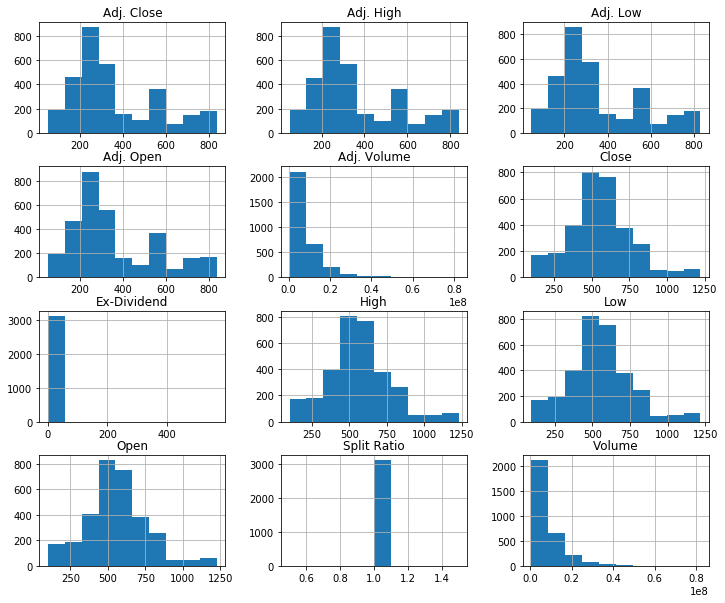

In [8]:
data.hist(figsize=(12,10))

In [9]:
# correlation of the data
data.corr()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Open,1.000000,0.999705,0.999566,0.999277,-0.526805,0.001177,NaN,0.733222,0.732091,0.733943,0.732733,-0.526805
High,0.999705,1.000000,0.999514,0.999629,-0.523185,0.002026,NaN,0.732420,0.731656,0.733296,0.732334,-0.523185
Low,0.999566,0.999514,1.000000,0.999700,-0.533264,0.001047,NaN,0.733275,0.732299,0.734538,0.733324,-0.533264
Close,0.999277,0.999629,0.999700,1.000000,-0.528669,0.001033,NaN,0.732773,0.732046,0.734033,0.733190,-0.528669
Volume,-0.526805,-0.523185,-0.533264,-0.528669,1.000000,-0.009345,NaN,-0.558889,-0.556840,-0.562534,-0.559904,1.000000
Ex-Dividend,0.001177,0.002026,0.001047,0.001033,-0.009345,1.000000,NaN,0.020027,0.020976,0.019829,0.019881,-0.009345
Split Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adj. Open,0.733222,0.732420,0.733275,0.732773,-0.558889,0.020027,NaN,1.000000,0.999871,0.999809,0.999684,-0.558889
Adj. High,0.732091,0.731656,0.732299,0.732046,-0.556840,0.020976,NaN,0.999871,1.000000,0.999788,0.999835,-0.556840
Adj. Low,0.733943,0.733296,0.734538,0.734033,-0.562534,0.019829,NaN,0.999809,0.999788,1.000000,0.999871,-0.562534


<p>It is possible to plot a couple of graphs based on various features</p>

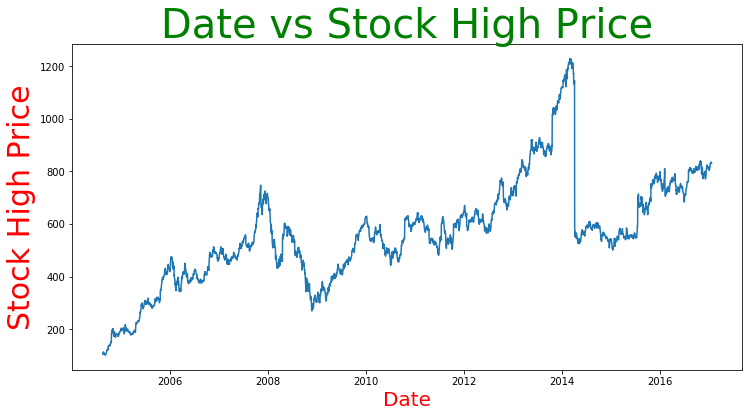

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data['High'])
plt.title("Date vs Stock High Price",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Stock High Price",fontsize=30,color='r')
plt.show()

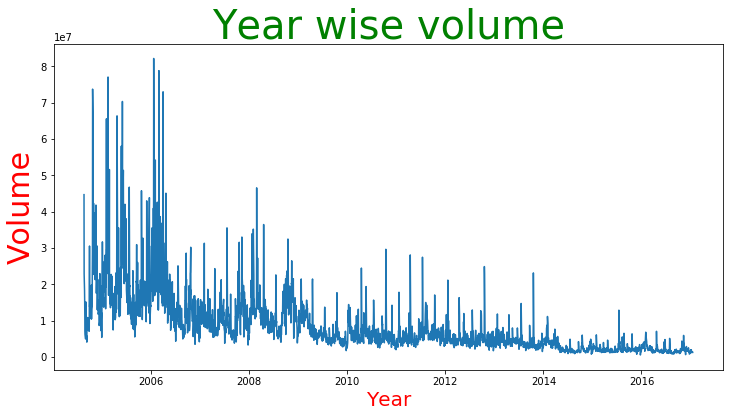

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data['Volume'])
plt.title("Year wise volume",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Volume",fontsize=30,color='r')
plt.show()



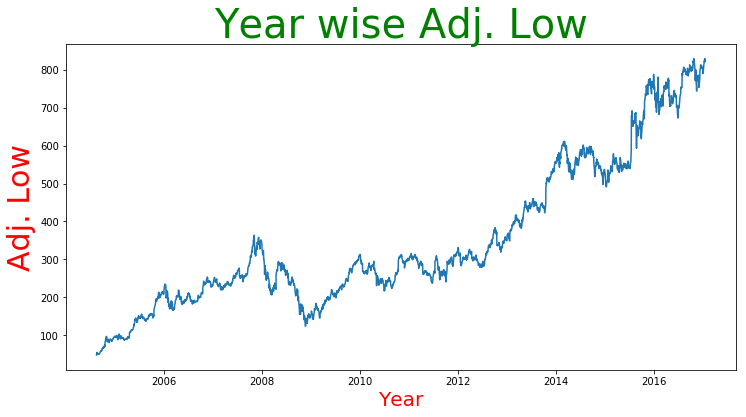

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data['Adj. Low'])
plt.title("Year wise Adj. Low",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Adj. Low",fontsize=30,color='r')
plt.show()

<h3>Implementing the model.</h3>

<p>We will need to manipulate the data to get the features we would like to use.</p>

In [29]:
data['High_Low_Change']=(data['Adj. High']-data['Adj. Close'])/data['Adj. Close']*100.0
data['Change_Percentage']=(data['Adj. Close']-data['Adj. Open'])/data['Adj. Open']*100.0  
dataset=data[['Adj. Close','High_Low_Change','Change_Percentage','Adj. Volume']]
# fill the null entries
dataset.fillna(-9999,inplace=True)
    

/home/muoki/.local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


<p>We've made a dataframe with four columns to use in our analysis.</p>

In [31]:
dataset.head()

,Adj. Close,High_Low_Change,Change_Percentage,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [32]:
dataset['Price_After_Month']=dataset['Adj. Close'].shift(-30)

/home/muoki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
dataset.head(0)

,Adj. Close,High_Low_Change,Change_Percentage,Adj. Volume,Price_After_Month
Date,,,,,


<h4>Features.</h4>
<p>For our independent variable we will be using all the columns in our new dataframe apart from Price_After_Month which will be our dependent variable</p>

In [38]:
X=np.array(dataset.drop(['Price_After_Month'],1))
X=preprocessing.scale(X)
X=X[:-30]
X_Check=X[-30:]

# drop the null values
dataset.dropna(inplace=True)
y=np.array(dataset['Price_After_Month'])

/home/muoki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<p></p>